<a href="https://colab.research.google.com/github/AllieUbisse/machine-learning-Competitions/blob/master/titanic_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import pandas as pd
import numpy as np

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Loading Data

In [0]:
train_URL = 'https://raw.githubusercontent.com/Data-HAWKS/titanic-competition/master/titanic-competition/train.csv'
test_URL = 'https://raw.githubusercontent.com/Data-HAWKS/titanic-competition/master/titanic-competition/test.csv'
sub_URL = 'https://raw.githubusercontent.com/Data-HAWKS/titanic-competition/master/titanic-competition/gender_submission.csv'

In [0]:
train_df1 = pd.read_csv(train_URL, index_col='PassengerId')
test_df = pd.read_csv(test_URL,  index_col='PassengerId')
sub_df = pd.read_csv(sub_URL)

# Data Exploration

In [137]:
test_df.head()
#test_df.shape

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [135]:
train_df1.head()
train_df1.shape

(891, 11)

In [0]:
train_df = pd.concat([train_df,test_df], axis=0)
print(train_df.shape)



In [140]:

print(train_df.shape)
train_df.reset_index().head()

(1309, 11)


,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


## Train

In [141]:
train_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [142]:
train_df.dtypes

Age         float64
Cabin        object
Embarked     object
Fare        float64
Name         object
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
Ticket       object
dtype: object

In [143]:
train_df.shape

(1309, 11)

In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [145]:
train_df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

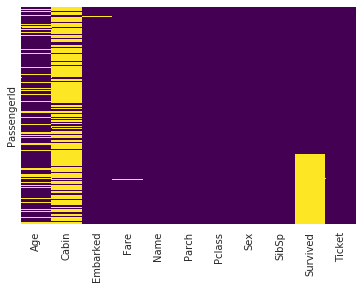

In [146]:
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Imputing NAN values
method = mean() 

### Survived countplot

Survived = 1

NOT Survived = 0




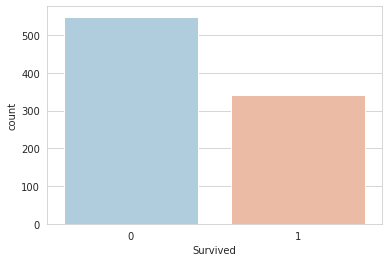

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df,palette='RdBu_r')

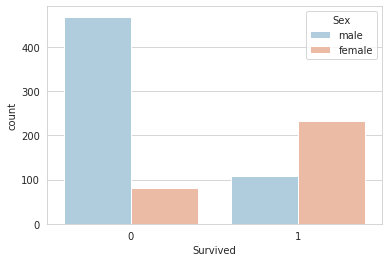

In [14]:
# Survived based on Sex, so we set the parameter hue = 'Sex'
sns.countplot(x='Survived', hue='Sex' ,data=train_df,palette='RdBu_r')

From the above:
more females survived then male.

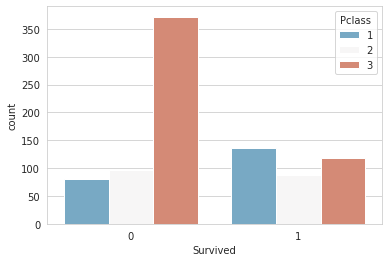

In [22]:
sns.countplot(x='Survived', hue='Pclass' ,data=train_df,palette='RdBu_r')

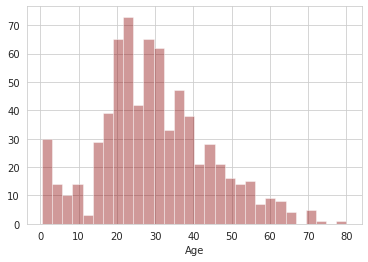

In [26]:
sns.distplot(train_df['Age'].dropna(), kde=False, color='darkred',bins=30)

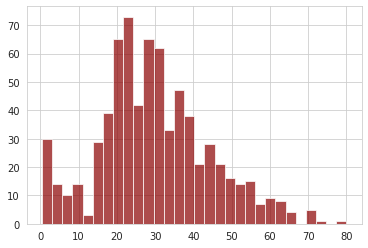

In [27]:
train_df['Age'].hist(bins=30,color='darkred',alpha=0.7)

the dist is more close to normal distribution

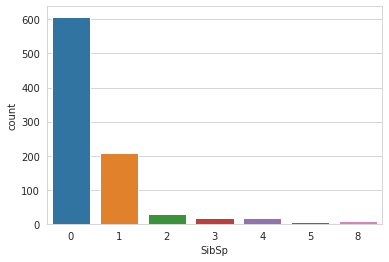

In [29]:
sns.countplot(x='SibSp', data=train_df)

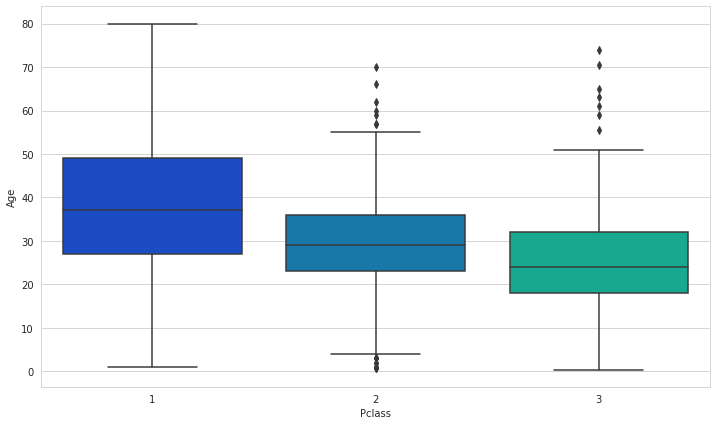

In [31]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_df, palette='winter')

In [0]:
def impute_nan_age(cols):

    Age = cols[0] 
    Pclass = cols[1]

    if pd.isnull(Age):
      
        if Pclass == 1:
          return int(train_df.groupby('Pclass')['Age'].mean()[1])
        
        elif Pclass == 2:
          return int(train_df.groupby('Pclass')['Age'].mean()[2])
        
        else:
          return int(train_df.groupby('Pclass')['Age'].mean()[3])

    else:
      return Age  
    


applying the function to impute the Age using Pclass

In [0]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_nan_age, axis=1)

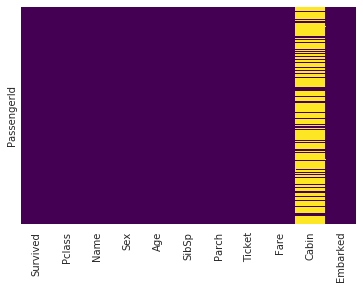

In [101]:
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For now, i will drop cabin since its having many null values 

In [102]:
train = train_df.drop('Cabin',axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
train.drop(['Name','Sex','Embarked','Ticket'], axis=1, inplace=True)

In [105]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [107]:
train.reset_index().head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Train Test Split

In [0]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=101)

## Training & testing the model



### KNeighborsClassifier

In [0]:
classifier = KNeighborsClassifier(
                                  n_neighbors = 5,
                                  weights = 'distance',
                                  metric = 'minkowski',
                                  p=2
                                 )


In [0]:
model = classifier.fit(x_train,y_train)

In [0]:
y_pred1 = model.predict(x_test)

### RandomForestClassifier

In [0]:
model_2 = RandomForestClassifier(n_estimators=100)

In [152]:
model_2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred2 = model_2.predict(x_test)

## accuracy_score

In [176]:
print(f'Random Forest Classifier accuracy score : {accuracy_score(y_true=y_test,y_pred= y_pred2)}')
print(f'KNeighbors Classifier accuracy score : {accuracy_score(y_true=y_test,y_pred=y_pred1)}')

Random Forest Classifier accuracy score : 0.8059701492537313
KNeighbors Classifier accuracy score : 0.7126865671641791


# Submission

In [177]:
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
y_final_pred = y_pred2

In [0]:
submission = pd.DataFrame( {
    'PassengerId' : y_test.reset_index()['PassengerId'],
     'Survived': y_final_pred
} )

submission.to_csv('titanic_submission.csv', index = False)

In [181]:
submission.head()

,PassengerId,Survived
0,332,0
1,701,1
2,749,0
3,752,1
4,482,0


# extras

```python

# importing required libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
 
# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')
 
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)
 
# Now, we need to predict the missing target variable in the test data
# target variable - Survived
 
# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']
 
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

```

**Create the object of the XGBoost model**

You can also add other parameters and test your code here

Some settings are : *max_depth* and *n_estimators*

```python

model = XGBClassifier()
 
# fit the model with the training data
model.fit(train_x,train_y)
 
 
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 
 
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 
 
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

```

[XGBoost Model in Python using scikit-learn](https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq)

[xgboost read the docs](https://xgboost.readthedocs.io/en/latest/index.html)

In [182]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
model_3 = XGBClassifier()
model_3.fit(x_train,y_train)
y_pred3 = model_3.predict(x_test)

In [189]:
print(f'Random Forest Classifier | accuracy score : {accuracy_score(y_true=y_test,y_pred= y_pred2)}\n')
print(f'KNeighbors    Classifier | accuracy score : {accuracy_score(y_true=y_test,y_pred=y_pred1)} \n')
print(f'xgboost       Classifier | accuracy score : {accuracy_score(y_true=y_test,y_pred=y_pred3)} \n')

Random Forest Classifier | accuracy score : 0.8059701492537313

KNeighbors    Classifier | accuracy score : 0.7126865671641791 

xgboost       Classifier | accuracy score : 0.8283582089552238 

